# EDA exploring for Inquiry and Prices dataset


## Import necassary libraries

In [1]:
# Import necassary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats
import statsmodels.api as sm


In [2]:
%matplotlib inline

In [3]:
#Load datasets
df_merged_IP = pd.read_csv('../data/merged_inquiries_and_prices.csv')

In [4]:
df_merged_IP.head()

,Unnamed: 0,listing_id,title_x,date,time_x,adult_count_x,children_count_x,pets_count_x,arrival_date_x,departure_date_x,inquiry_price_x,length_stay_x,min_days,date_from,date_to,filled_in_price_per_day,filled_in_price_per_week,month,price_catagory
0,0,b334776d-0cf1-51f1-8cdc-37535b280f3d,Anfrage,2019-01-01 00:00:00,2021-07-22 00:07:31,6.0,2.0,0.0,2019-07-24 00:00:00,2019-07-31 00:00:00,1601.0,7,7.0,2019-06-14 00:00:00,2019-09-01 00:00:00,188.0,1316.0,2019-06,Both
1,2,80f54c2a-c1f9-5744-a2c8-b8764c0bde87,Anfrage,2019-01-01 00:00:00,2021-07-22 00:24:34,2.0,1.0,0.0,2019-10-13 00:00:00,2019-10-20 00:00:00,0.0,7,2.0,2019-09-27 00:00:00,2019-10-13 00:00:00,75.0,500.0,2019-09,Both
2,3,80f54c2a-c1f9-5744-a2c8-b8764c0bde87,Anfrage,2019-01-01 00:00:00,2021-07-22 00:24:34,2.0,1.0,0.0,2019-10-13 00:00:00,2019-10-20 00:00:00,0.0,7,2.0,2019-10-13 00:00:00,2019-10-28 00:00:00,75.0,500.0,2019-10,Both
3,5,202306bf-f261-5975-8356-11719a53a063,Anfrage,2019-01-01 00:00:00,2021-07-22 01:06:48,2.0,0.0,0.0,2019-04-30 00:00:00,2019-05-03 00:00:00,237.0,3,3.0,2018-09-30 00:00:00,2019-06-01 00:00:00,79.0,553.0,2018-09,Day
4,11,afcd1d75-762c-59e0-b59a-70bd6432cd8d,Anfrage,2019-01-01 00:00:00,2021-07-22 03:30:20,2.0,1.0,0.0,2019-07-06 00:00:00,2019-07-14 00:00:00,705.0,8,3.0,2019-07-06 00:00:00,2019-07-07 00:00:00,105.0,735.0,2019-07,Day


## Correcting date and time formatting.

In [5]:
df_merged_IP['date_from'] = pd.to_datetime(df_merged_IP['date_from'], errors = 'coerce')
df_merged_IP['date_to'] = pd.to_datetime(df_merged_IP['date_to'], errors = 'coerce')
df_merged_IP['date'] = pd.to_datetime(df_merged_IP['date'], errors = 'coerce')
df_merged_IP['time_x'] = pd.to_datetime(df_merged_IP['time_x'], errors = 'coerce')
df_merged_IP['arrival_date_x'] = pd.to_datetime(df_merged_IP['arrival_date_x'], errors = 'coerce')
df_merged_IP['departure_date_x'] = pd.to_datetime(df_merged_IP['departure_date_x'], errors = 'coerce')

In [6]:
# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (11, 7)

## Deleting redundant column

In [7]:
del df_merged_IP['Unnamed: 0']

## Descriptive statistics

In [8]:
df_merged_IP.describe()

,adult_count_x,children_count_x,pets_count_x,inquiry_price_x,length_stay_x,min_days,filled_in_price_per_day,filled_in_price_per_week
count,1.191363e+06,1.191363e+06,1.191363e+06,1.114013e+06,1.193366e+06,1.193276e+06,1.191664e+06,1.192185e+06
mean,2.749504e+00,3.220177e-01,1.205586e-01,6.251041e+02,6.745939e+00,3.934575e+00,8.693817e+01,5.999989e+02
std,1.130612e+00,6.633059e-01,3.256137e-01,3.745990e+02,3.117497e+00,2.218047e+00,3.531662e+01,2.440951e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,7.000000e-02
25%,2.000000e+00,0.000000e+00,0.000000e+00,3.440000e+02,4.000000e+00,2.000000e+00,6.000000e+01,4.200000e+02
50%,2.000000e+00,0.000000e+00,0.000000e+00,5.510000e+02,7.000000e+00,4.000000e+00,8.000000e+01,5.600000e+02
75%,4.000000e+00,0.000000e+00,0.000000e+00,8.300000e+02,7.000000e+00,6.000000e+00,1.050000e+02,7.350000e+02
max,6.000000e+00,2.000000e+00,1.000000e+00,1.820000e+03,1.400000e+01,2.800000e+01,2.200000e+02,1.540000e+03


In [9]:
df_merged_IP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193366 entries, 0 to 1193365
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   listing_id                1193366 non-null  object        
 1   title_x                   1193366 non-null  object        
 2   date                      1193366 non-null  datetime64[ns]
 3   time_x                    1193366 non-null  datetime64[ns]
 4   adult_count_x             1191363 non-null  float64       
 5   children_count_x          1191363 non-null  float64       
 6   pets_count_x              1191363 non-null  float64       
 7   arrival_date_x            1193366 non-null  datetime64[ns]
 8   departure_date_x          1193366 non-null  datetime64[ns]
 9   inquiry_price_x           1114013 non-null  float64       
 10  length_stay_x             1193366 non-null  int64         
 11  min_days                  1193276 non-null  float6

## graphing interactions

[Text(0.5, 0, 'adult_count_x'),
 Text(1.5, 0, 'children_count_x'),
 Text(2.5, 0, 'pets_count_x'),
 Text(3.5, 0, 'inquiry_price_x'),
 Text(4.5, 0, 'length_stay_x'),
 Text(5.5, 0, 'min_days'),
 Text(6.5, 0, 'filled_in_price_per_day'),
 Text(7.5, 0, 'filled_in_price_per_week')]

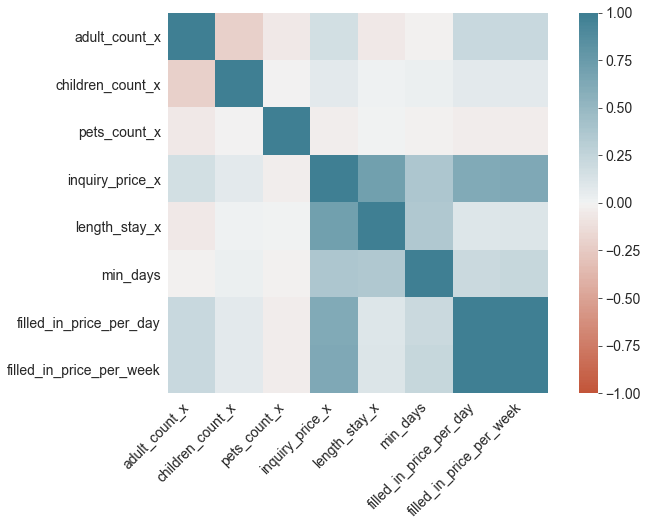

In [10]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap
corr = df_merged_IP.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

In [11]:
df_merged_IP.corr()

,adult_count_x,children_count_x,pets_count_x,inquiry_price_x,length_stay_x,min_days,filled_in_price_per_day,filled_in_price_per_week
adult_count_x,1.000000,-0.212226,-0.049056,0.169633,-0.048690,-0.013940,0.225590,0.225430
children_count_x,-0.212226,1.000000,-0.003117,0.077423,0.020717,0.028789,0.070569,0.071469
pets_count_x,-0.049056,-0.003117,1.000000,-0.028295,0.005737,-0.019615,-0.035761,-0.038683
inquiry_price_x,0.169633,0.077423,-0.028295,1.000000,0.715226,0.369808,0.616042,0.627600
length_stay_x,-0.048690,0.020717,0.005737,0.715226,1.000000,0.364759,0.107975,0.114457
min_days,-0.013940,0.028789,-0.019615,0.369808,0.364759,1.000000,0.216305,0.231749
filled_in_price_per_day,0.225590,0.070569,-0.035761,0.616042,0.107975,0.216305,1.000000,0.987069
filled_in_price_per_week,0.225430,0.071469,-0.038683,0.627600,0.114457,0.231749,0.987069,1.000000


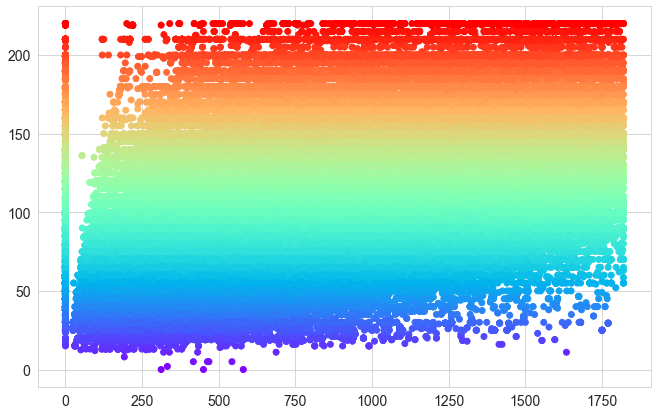

In [12]:
plt.scatter(df_merged_IP['inquiry_price_x'], df_merged_IP['filled_in_price_per_day'], c=df_merged_IP['filled_in_price_per_day'], cmap='rainbow');

In [13]:
df_merged_IP['price_catagory'].unique()

array(['Both', 'Day', 'Week', 'No_info'], dtype=object)

In [14]:
#sns.pairplot(df_merged_IP, hue="price_catagory", height=3);

## Modelling 

In [15]:
df_merged_IP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193366 entries, 0 to 1193365
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   listing_id                1193366 non-null  object        
 1   title_x                   1193366 non-null  object        
 2   date                      1193366 non-null  datetime64[ns]
 3   time_x                    1193366 non-null  datetime64[ns]
 4   adult_count_x             1191363 non-null  float64       
 5   children_count_x          1191363 non-null  float64       
 6   pets_count_x              1191363 non-null  float64       
 7   arrival_date_x            1193366 non-null  datetime64[ns]
 8   departure_date_x          1193366 non-null  datetime64[ns]
 9   inquiry_price_x           1114013 non-null  float64       
 10  length_stay_x             1193366 non-null  int64         
 11  min_days                  1193276 non-null  float6

In [16]:
df_merged_IP = df_merged_IP.dropna()

In [17]:
rs = smf.ols(formula='inquiry_price_x ~ filled_in_price_per_day + filled_in_price_per_week', data=df_merged_IP).fit().summary()


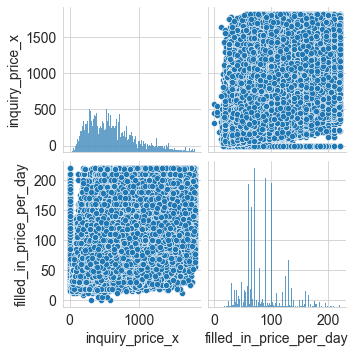

In [18]:
df_MIP = df_merged_IP[['inquiry_price_x', 'filled_in_price_per_day']]
sns.pairplot(df_MIP);

In [19]:
df_MIP = sm.add_constant(df_MIP)
y3 = df_merged_IP.filled_in_price_per_day

model3 = sm.OLS(y3, df_MIP)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     filled_in_price_per_day   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 1.299e+35
Date:                     Thu, 22 Jul 2021   Prob (F-statistic):               0.00
Time:                             16:52:23   Log-Likelihood:             3.2044e+07
No. Observations:                  1110562   AIC:                        -6.409e+07
Df Residuals:                      1110559   BIC:                        -6.409e+07
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1.032e-13   1.82e-16    568.640      0.000    1.03e-13    1.04e-13
inquiry_price_x          -1.25e-16   2.29e-19   -545.335      0.000   -1.25e-16   -1.25e-16
filled_in_price_per_day     1.0000   2.49e-18   4.01e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                    98116.174   Durbin-Watson:                   0.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           126276.749
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       3.235   Cond. No.                     1.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Comparative of 'Both', 'Day', 'Week', 'No_info'

as filled by homeowner


In [34]:
#df_merged_IP.groupby(['Both', 'Day', 'Week', 'No_info'])


df_Day = df_merged_IP.groupby(df_merged_IP.price_catagory == 'Both')
df_M_week = df_merged_IP.groupby(df_merged_IP.price_catagory == 'Week')
df_M_both = df_merged_IP.groupby(df_merged_IP.price_catagory == 'Both')
df_M_neither = df_merged_IP.groupby(df_merged_IP.price_catagory == 'No_info')

In [36]:
df_M_week.describe()

adult_count_x                                               \
                       count      mean       std  min  25%  50%  75%  max   
price_catagory                                                              
False              1081831.0  2.734973  1.117155  0.0  2.0  2.0  4.0  6.0   
True                 28731.0  2.887334  1.226694  1.0  2.0  2.0  4.0  6.0   

               children_count_x            ... filled_in_price_per_day  \
                          count      mean  ...                     75%   
price_catagory                             ...                           
False                 1081831.0  0.314606  ...                   100.0   
True                    28731.0  0.410045  ...                   113.0   

                           filled_in_price_per_week                          \
                       max                    count        mean         std   
price_catagory                                                                
False           220.000000                1081831.0  590.597664  237.101858   
True            196.428571                  28731.0  627.823655  254.112807   

                                                     
                   min    25%    50%    75%     max  
price_catagory                                       
False             0.07  420.0  560.0  700.0  1540.0  
True            109.00  441.0  575.0  791.0  1375.0  

[2 rows x 64 columns]